# `Contact` , `Merge` and `Join` in pandas

- Dataframe object can be seen as a collection of series in a table like structure.
- Sometimes we get to see separate datasets for analysis.
- So , it sometimes become necessary to unify them hence pandas methods like - Merge , Join , concatenate come in very handy.

# `1. Joins`

- A join ias a way to combine two dataframebased on a common index or column.

**Types of Joins :**
1. Inner Join - Return only the `matching rows from both dataframes` . `Rows with no match` will be `excluded.`
2. Left Join - Return all `rows from the left dataframe` and `Unmatched rows` in the right will become `NAN.`
3. Right Join - Return all `rows from the right dataframe` and `Unmatched rows` in the left become `NAN.`
4. Outer Join - Return all `rows from both dataframes` and it will `fill missing` matches with `NAN.`

! 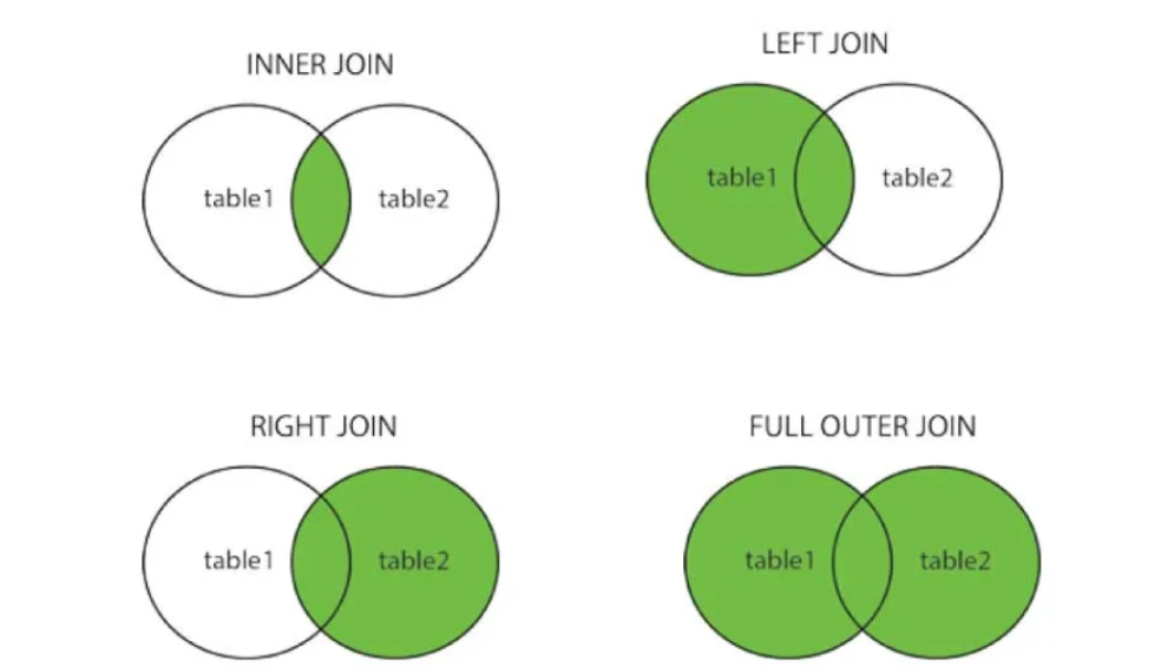

In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame({
    'EmpID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Dept': ['HR', 'Finance', 'IT', 'IT', 'Marketing']
})

df2 = pd.DataFrame({
    'ID': [103, 104, 105, 106, 107,108,110],
    'Salary': [70000, 75000, 72000, 68000, 71000,45000,67000],
    'Bonus': [5000, 6000, 5500, 4000, 3000,2000,7000]
})

In [5]:
df1

EmpID     Name       Dept
0    101    Alice         HR
1    102      Bob    Finance
2    103  Charlie         IT
3    104    David         IT
4    105      Eva  Marketing

In [6]:
df2

ID  Salary  Bonus
0  103   70000   5000
1  104   75000   6000
2  105   72000   5500
3  106   68000   4000
4  107   71000   3000
5  108   45000   2000
6  110   67000   7000

In [8]:
df1.join(df2 , how = 'inner')

EmpID     Name       Dept   ID  Salary  Bonus
0    101    Alice         HR  103   70000   5000
1    102      Bob    Finance  104   75000   6000
2    103  Charlie         IT  105   72000   5500
3    104    David         IT  106   68000   4000
4    105      Eva  Marketing  107   71000   3000

In [9]:
# Left Join

df1.join(df2 , how = 'left')

EmpID     Name       Dept   ID  Salary  Bonus
0    101    Alice         HR  103   70000   5000
1    102      Bob    Finance  104   75000   6000
2    103  Charlie         IT  105   72000   5500
3    104    David         IT  106   68000   4000
4    105      Eva  Marketing  107   71000   3000

In [10]:
# right join

df1.join(df2 , how = 'right')

EmpID     Name       Dept   ID  Salary  Bonus
0  101.0    Alice         HR  103   70000   5000
1  102.0      Bob    Finance  104   75000   6000
2  103.0  Charlie         IT  105   72000   5500
3  104.0    David         IT  106   68000   4000
4  105.0      Eva  Marketing  107   71000   3000
5    NaN      NaN        NaN  108   45000   2000
6    NaN      NaN        NaN  110   67000   7000

In [11]:
# outer / full / full outer join
df1.join(df2 , how = 'outer')

EmpID     Name       Dept   ID  Salary  Bonus
0  101.0    Alice         HR  103   70000   5000
1  102.0      Bob    Finance  104   75000   6000
2  103.0  Charlie         IT  105   72000   5500
3  104.0    David         IT  106   68000   4000
4  105.0      Eva  Marketing  107   71000   3000
5    NaN      NaN        NaN  108   45000   2000
6    NaN      NaN        NaN  110   67000   7000

In [12]:
df1 = pd.DataFrame({
    'EmpID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Dept': ['HR', 'Finance', 'IT', 'IT', 'Marketing']
}).set_index('EmpID')

df2 = pd.DataFrame({
    'ID': [103, 104, 105, 106, 107,108,110],
    'Salary': [70000, 75000, 72000, 68000, 71000,45000,67000],
    'Bonus': [5000, 6000, 5500, 4000, 3000,2000,7000]
}).set_index('ID')

In [13]:
df1

Name       Dept
EmpID                    
101      Alice         HR
102        Bob    Finance
103    Charlie         IT
104      David         IT
105        Eva  Marketing

In [14]:
df2

Salary  Bonus
ID                
103   70000   5000
104   75000   6000
105   72000   5500
106   68000   4000
107   71000   3000
108   45000   2000
110   67000   7000

In [16]:
df1.join(df2 , how = 'inner')

Name       Dept  Salary  Bonus
103  Charlie         IT   70000   5000
104    David         IT   75000   6000
105      Eva  Marketing   72000   5500

In [17]:
df1.join(df2 , how='left')

Name       Dept   Salary   Bonus
EmpID                                     
101      Alice         HR      NaN     NaN
102        Bob    Finance      NaN     NaN
103    Charlie         IT  70000.0  5000.0
104      David         IT  75000.0  6000.0
105        Eva  Marketing  72000.0  5500.0

In [18]:
df1.join(df2 , how = 'right')

Name       Dept  Salary  Bonus
ID                                    
103  Charlie         IT   70000   5000
104    David         IT   75000   6000
105      Eva  Marketing   72000   5500
106      NaN        NaN   68000   4000
107      NaN        NaN   71000   3000
108      NaN        NaN   45000   2000
110      NaN        NaN   67000   7000

In [19]:
df1.join(df2 , how = 'right')

Name       Dept  Salary  Bonus
ID                                    
103  Charlie         IT   70000   5000
104    David         IT   75000   6000
105      Eva  Marketing   72000   5500
106      NaN        NaN   68000   4000
107      NaN        NaN   71000   3000
108      NaN        NaN   45000   2000
110      NaN        NaN   67000   7000

In [20]:
df1.join(df2 , how = 'outer')

Name       Dept   Salary   Bonus
101    Alice         HR      NaN     NaN
102      Bob    Finance      NaN     NaN
103  Charlie         IT  70000.0  5000.0
104    David         IT  75000.0  6000.0
105      Eva  Marketing  72000.0  5500.0
106      NaN        NaN  68000.0  4000.0
107      NaN        NaN  71000.0  3000.0
108      NaN        NaN  45000.0  2000.0
110      NaN        NaN  67000.0  7000.0

In [25]:
# when we have same col use - merge

df1 = pd.DataFrame({
    'ID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Dept': ['HR', 'Finance', 'IT', 'IT', 'Marketing']
})

df2 = pd.DataFrame({
    'ID': [103, 104, 105, 106, 107,108,110],
    'Salary': [70000, 75000, 72000, 68000, 71000,45000,67000],
    'Bonus': [5000, 6000, 5500, 4000, 3000,2000,7000]
})

In [23]:
df1

ID     Name       Dept
0  101    Alice         HR
1  102      Bob    Finance
2  103  Charlie         IT
3  104    David         IT
4  105      Eva  Marketing

In [24]:
df2

ID  Salary  Bonus
0  103   70000   5000
1  104   75000   6000
2  105   72000   5500
3  106   68000   4000
4  107   71000   3000
5  108   45000   2000
6  110   67000   7000

In [22]:
df1.merge(df2 , how = 'inner')   # default

ID     Name       Dept  Salary  Bonus
0  103  Charlie         IT   70000   5000
1  104    David         IT   75000   6000
2  105      Eva  Marketing   72000   5500

In [26]:
df1.merge(df2 , how = 'left')

ID     Name       Dept   Salary   Bonus
0  101    Alice         HR      NaN     NaN
1  102      Bob    Finance      NaN     NaN
2  103  Charlie         IT  70000.0  5000.0
3  104    David         IT  75000.0  6000.0
4  105      Eva  Marketing  72000.0  5500.0

In [27]:
df1.merge(df2 , how = 'right')

ID     Name       Dept  Salary  Bonus
0  103  Charlie         IT   70000   5000
1  104    David         IT   75000   6000
2  105      Eva  Marketing   72000   5500
3  106      NaN        NaN   68000   4000
4  107      NaN        NaN   71000   3000
5  108      NaN        NaN   45000   2000
6  110      NaN        NaN   67000   7000

In [28]:
df1.merge(df2 , how = 'outer')

ID     Name       Dept   Salary   Bonus
0  101    Alice         HR      NaN     NaN
1  102      Bob    Finance      NaN     NaN
2  103  Charlie         IT  70000.0  5000.0
3  104    David         IT  75000.0  6000.0
4  105      Eva  Marketing  72000.0  5500.0
5  106      NaN        NaN  68000.0  4000.0
6  107      NaN        NaN  71000.0  3000.0
7  108      NaN        NaN  45000.0  2000.0
8  110      NaN        NaN  67000.0  7000.0

In [42]:
data = {'left_key' : ['a' , 'b' , 'c' , 'a'] ,
        'value' : [1,2,3,5] ,}
df1 = pd.DataFrame(data)

In [43]:
data2 = {'Right_key' : ['a' , 'b' , 'c' , 'a'] , 
         'value' : [5,6,7,8]}
df2 = pd.DataFrame(data2)

In [44]:
df1

left_key  value
0        a      1
1        b      2
2        c      3
3        a      5

In [45]:
df2

Right_key  value
0         a      5
1         b      6
2         c      7
3         a      8

In [46]:
df1.merge(df2)

left_key  value Right_key
0        a      5         a

In [47]:
df1.merge(df2 , left_on = 'left_key' , right_on = 'Right_key')

left_key  value_x Right_key  value_y
0        a        1         a        5
1        a        1         a        8
2        b        2         b        6
3        c        3         c        7
4        a        5         a        5
5        a        5         a        8

In [48]:
data = {'empid' : [1,2,3] , 
        'name' : ['aditya' , 'bhushan' , 'chaitanya']}

df1 = pd.DataFrame(data)

In [50]:
data = {'emp_num' : [1,2,4] ,
        'salary' : [50,60,70]}
df2 = pd.DataFrame(data)

In [51]:
df1

empid       name
0      1     aditya
1      2    bhushan
2      3  chaitanya

In [52]:
df2

emp_num  salary
0        1      50
1        2      60
2        4      70

In [53]:
df1.merge(df2 , left_on = 'empid' , right_on = 'emp_num')

empid     name  emp_num  salary
0      1   aditya        1      50
1      2  bhushan        2      60

In [55]:
df1.merge(df2 , how = 'left' , left_on = 'empid' , right_on = 'emp_num')

empid       name  emp_num  salary
0      1     aditya      1.0    50.0
1      2    bhushan      2.0    60.0
2      3  chaitanya      NaN     NaN

In [56]:
df1.merge(df2 , how = 'right' , left_on = 'empid' , right_on = 'emp_num')

empid     name  emp_num  salary
0    1.0   aditya        1      50
1    2.0  bhushan        2      60
2    NaN      NaN        4      70

In [57]:
df1.merge(df2 , how = 'outer' , left_on = 'empid' , right_on = 'emp_num')

empid       name  emp_num  salary
0    1.0     aditya      1.0    50.0
1    2.0    bhushan      2.0    60.0
2    3.0  chaitanya      NaN     NaN
3    NaN        NaN      4.0    70.0

In [59]:
df1.merge(df2 , how = 'cross')

empid       name  emp_num  salary
0      1     aditya        1      50
1      1     aditya        2      60
2      1     aditya        4      70
3      2    bhushan        1      50
4      2    bhushan        2      60
5      2    bhushan        4      70
6      3  chaitanya        1      50
7      3  chaitanya        2      60
8      3  chaitanya        4      70

In [60]:
# Diff between join and merge

In [65]:
data = { 'city_1' : [ 'chennai' , 'hydrabaad' , 'vizag' , 'kochi' , 'nasik'] ,
         'temp' : [15 , 33 , 38 , 35 , 34]}
data2 = { 'city_2' : ['chennai' , 'hydrabaad' , 'vizag' , 'kochi' , 'pune'] ,
          'humid' : [44 , 40 , 43 , 42 , 45]}

df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

In [66]:
df1

city_1  temp
0    chennai    15
1  hydrabaad    33
2      vizag    38
3      kochi    35
4      nasik    34

In [67]:
df2

city_2  humid
0    chennai     44
1  hydrabaad     40
2      vizag     43
3      kochi     42
4       pune     45

In [68]:
df1.join(df2 , how = 'inner')

city_1  temp     city_2  humid
0    chennai    15    chennai     44
1  hydrabaad    33  hydrabaad     40
2      vizag    38      vizag     43
3      kochi    35      kochi     42
4      nasik    34       pune     45

In [69]:
df1.join(df2 , how = 'left')

city_1  temp     city_2  humid
0    chennai    15    chennai     44
1  hydrabaad    33  hydrabaad     40
2      vizag    38      vizag     43
3      kochi    35      kochi     42
4      nasik    34       pune     45

In [70]:
df1.join(df2 , how = 'right')

city_1  temp     city_2  humid
0    chennai    15    chennai     44
1  hydrabaad    33  hydrabaad     40
2      vizag    38      vizag     43
3      kochi    35      kochi     42
4      nasik    34       pune     45

In [71]:
df1.join(df2 , how = 'outer')

city_1  temp     city_2  humid
0    chennai    15    chennai     44
1  hydrabaad    33  hydrabaad     40
2      vizag    38      vizag     43
3      kochi    35      kochi     42
4      nasik    34       pune     45

In [73]:
df1.merge(df2 , how = 'inner' , left_on = 'city_1' , right_on = 'city_2')

city_1  temp     city_2  humid
0    chennai    15    chennai     44
1  hydrabaad    33  hydrabaad     40
2      vizag    38      vizag     43
3      kochi    35      kochi     42

In [74]:
df1.merge(df2 , how = 'left' , left_on = 'city_1' , right_on = 'city_2')

city_1  temp     city_2  humid
0    chennai    15    chennai   44.0
1  hydrabaad    33  hydrabaad   40.0
2      vizag    38      vizag   43.0
3      kochi    35      kochi   42.0
4      nasik    34        NaN    NaN

In [75]:
df1.merge(df2 , how = 'right' , left_on = 'city_1' , right_on = 'city_2')

city_1  temp     city_2  humid
0    chennai  15.0    chennai     44
1  hydrabaad  33.0  hydrabaad     40
2      vizag  38.0      vizag     43
3      kochi  35.0      kochi     42
4        NaN   NaN       pune     45

In [76]:
df1.merge(df2 , how = 'outer' , left_on = 'city_1' , right_on = 'city_2')

city_1  temp     city_2  humid
0    chennai  15.0    chennai   44.0
1  hydrabaad  33.0  hydrabaad   40.0
2      kochi  35.0      kochi   42.0
3      nasik  34.0        NaN    NaN
4        NaN   NaN       pune   45.0
5      vizag  38.0      vizag   43.0

In [78]:
df1.merge(df2 , how = 'cross')

city_1  temp     city_2  humid
0     chennai    15    chennai     44
1     chennai    15  hydrabaad     40
2     chennai    15      vizag     43
3     chennai    15      kochi     42
4     chennai    15       pune     45
5   hydrabaad    33    chennai     44
6   hydrabaad    33  hydrabaad     40
7   hydrabaad    33      vizag     43
8   hydrabaad    33      kochi     42
9   hydrabaad    33       pune     45
10      vizag    38    chennai     44
11      vizag    38  hydrabaad     40
12      vizag    38      vizag     43
13      vizag    38      kochi     42
14      vizag    38       pune     45
15      kochi    35    chennai     44
16      kochi    35  hydrabaad     40
17      kochi    35      vizag     43
18      kochi    35      kochi     42
19      kochi    35       pune     45
20      nasik    34    chennai     44
21      nasik    34  hydrabaad     40
22      nasik    34      vizag     43
23      nasik    34      kochi     42
24      nasik    34       pune     45

### Diff between join and merge
- Join will combile two dataframes on the index of the df and merge will combine based on the common col if present / the col you specify.
- default in join is left join and default in merge is inner merge.
- Multiple col or indices join is not possible , but you can specify multiple col in case of merge.

# Concat()
- Concatenation refers to how  we combine df based on index or labels of rows or col.
- We use .concat() method to achieve this in pandas.
- We can concatenate df both vertically (row wise , axis = 0) or horizontally (col wise , axis = 1)
- We can also concatenate more than two df or series at once.

In [79]:
df1

city_1  temp
0    chennai    15
1  hydrabaad    33
2      vizag    38
3      kochi    35
4      nasik    34

In [80]:
df2

city_2  humid
0    chennai     44
1  hydrabaad     40
2      vizag     43
3      kochi     42
4       pune     45

In [81]:
pd.concat([df1,df2] , axis = 0)

city_1  temp     city_2  humid
0    chennai  15.0        NaN    NaN
1  hydrabaad  33.0        NaN    NaN
2      vizag  38.0        NaN    NaN
3      kochi  35.0        NaN    NaN
4      nasik  34.0        NaN    NaN
0        NaN   NaN    chennai   44.0
1        NaN   NaN  hydrabaad   40.0
2        NaN   NaN      vizag   43.0
3        NaN   NaN      kochi   42.0
4        NaN   NaN       pune   45.0

**note** 
- If we observe index is not continued from first dataframe to next dataframe.
- To overcome this we can use `ignore_index = True`

In [82]:
pd.concat([df1,df2] , axis = 0 , ignore_index = True)

city_1  temp     city_2  humid
0    chennai  15.0        NaN    NaN
1  hydrabaad  33.0        NaN    NaN
2      vizag  38.0        NaN    NaN
3      kochi  35.0        NaN    NaN
4      nasik  34.0        NaN    NaN
5        NaN   NaN    chennai   44.0
6        NaN   NaN  hydrabaad   40.0
7        NaN   NaN      vizag   43.0
8        NaN   NaN      kochi   42.0
9        NaN   NaN       pune   45.0

In [83]:
pd.concat([df1,df2] , axis = 1 , ignore_index = True)

0   1          2   3
0    chennai  15    chennai  44
1  hydrabaad  33  hydrabaad  40
2      vizag  38      vizag  43
3      kochi  35      kochi  42
4      nasik  34       pune  45